![](../images/FE_00.png)

In [1]:
%load_ext autoreload
%autoreload 2

# 7. Đọc dữ liệu resampling từ file parquet đã làm từ **part_2**

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('Womens_Clothing_E_Commerce_Reviews').getOrCreate()

In [4]:
train = spark.read.parquet("../data/womens-ecommerce-clothing-reviews/womens-ecommerce-clothing-reviews_resampling.parquet")

In [5]:
train = train.withColumnRenamed('Rating', 'label')

In [6]:
train.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(14162,[0,1,2,3,4...|    5|
|(14162,[0,1,2,3,4...|    5|
|(14162,[0,1,2,3,4...|    4|
|(14162,[0,1,2,3,4...|    5|
|(14162,[0,1,2,3,4...|    4|
+--------------------+-----+
only showing top 5 rows



# 8. Đọc dữ liệu test

In [7]:
test = spark.read.parquet("../data/womens-ecommerce-clothing-reviews/womens-ecommerce-clothing-reviews_test.parquet")

In [8]:
test = test.withColumnRenamed('Rating', 'label')

In [9]:
test.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(14162,[0,1,2,3,4...|    5|
|(14162,[0,1,2,3,4...|    5|
|(14162,[0,1,2,3,5...|    5|
|(14162,[0,1,2,3,5...|    5|
|(14162,[0,1,2,3,5...|    4|
+--------------------+-----+
only showing top 5 rows



# 9. Build model
## 9.1. Logistic Regression
### 9.1.1. Build mode

In [10]:
from pyspark.ml.classification import LogisticRegression

In [11]:
logistic = LogisticRegression()

In [12]:
logistic_model_0 = logistic.fit(train)

### 9.1.2. Đánh giá model
#### 9.1.2.1. Trên train

In [15]:
logistic_train_res_0 = logistic_model_0.evaluate(train).predictions

In [16]:
logistic_train_res_0.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(14162,[0,1,2,3,4...|    5|[-7.5159571086450...|[1.40853771930600...|       5.0|
|(14162,[0,1,2,3,4...|    5|[-7.4841821435429...|[3.49600701422356...|       5.0|
|(14162,[0,1,2,3,4...|    4|[-7.4356528502575...|[4.56678330345686...|       4.0|
|(14162,[0,1,2,3,4...|    5|[-7.5193103323695...|[1.59586476394462...|       5.0|
|(14162,[0,1,2,3,4...|    4|[-7.3225228668739...|[3.58208299649052...|       4.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [17]:
logistic_train_res_0.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    5|       4.0|   56|
|    4|       4.0| 3894|
|    5|       5.0| 9893|
|    4|       5.0|   22|
|    3|       3.0| 2252|
|    3|       5.0|    1|
|    2|       2.0| 1269|
|    1|       1.0|  658|
+-----+----------+-----+



#### 9.1.2.2. Trên test data

In [18]:
logistic_test_res_0 = logistic_model_0.evaluate(test).predictions

In [19]:
logistic_test_res_0.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(14162,[0,1,2,3,4...|    5|[-7.5785694117219...|[7.59008023477275...|       5.0|
|(14162,[0,1,2,3,4...|    5|[-7.5252620743794...|[3.46572250237337...|       5.0|
|(14162,[0,1,2,3,5...|    5|[-7.5352500370684...|[3.07673091811777...|       5.0|
|(14162,[0,1,2,3,5...|    5|[-7.5261950889053...|[2.40210835457026...|       4.0|
|(14162,[0,1,2,3,5...|    4|[-7.5741753809317...|[3.01511129282859...|       5.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



#### 9.1.2.3. Confusion matrix

In [20]:
from modules.utils import confusionMatrix

In [21]:
cm = logistic_test_res_0.groupBy('label', 'prediction').count()

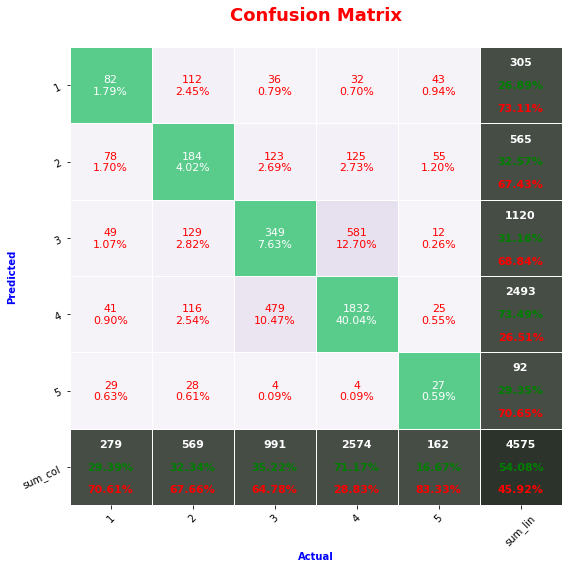

In [22]:
confusionMatrix(cm)

#### 9.1.2.4. Dựa theo **Accuracy**, **F1-Score**, **Precision**, **Recall** 

In [23]:
from modules.utils import classifierMultiEvaluator

In [24]:
predictions_labels = logistic_test_res_0.select('prediction', 'label')

In [25]:
classifierMultiEvaluator(predictions_labels)

,0
Accuracy,0.540765
F1-Score,0.543475
Precision,0.548237
Recall,0.540765


> **Nhận xét**:
> * Model dự đoán ko chính xác
> * Ko thể áp dụng Logistic Regression với tập dữ liệu này

### 9.1.3. Build trên dữ liệu không sampling

In [13]:
train = spark.read.parquet("../data/womens-ecommerce-clothing-reviews/womens-ecommerce-clothing-reviews_train.parquet")

In [14]:
train = train.withColumnRenamed('Rating', 'label')

In [26]:
logistic_model_1 = logistic.fit(train)

### 9.1.4. Đánh giá model
#### 9.1.4.1. Bằng các hệ số metric

In [27]:
logistic_test_res_1 = logistic_model_1.evaluate(test).predictions

In [28]:
predictions_labels_1 = logistic_test_res_1.select('prediction', 'label')

In [29]:
classifierMultiEvaluator(predictions_labels_1)

,0
Accuracy,0.533552
F1-Score,0.538583
Precision,0.545694
Recall,0.533552


> **Nhận xét:**
> * Cũng không tốt hơn